In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torch.utils.data import DataLoader, Dataset

import torchvision
from torchvision.io import read_image
from torchvision.transforms import ToTensor
import torchvision.transforms as T

In [3]:
data = pd.DataFrame()

0 for horses
1 for humans

In [4]:
import os

def makeDataframe(path, label):
    file_names = []
    print(path)
    
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            file_names.append(filename)
#             print(os.path.join(dirname, filename))

    data = pd.DataFrame()
    data['file'] = file_names
    data['label'] = label
    return data

def makeDataset(type):
    data_set_horses = makeDataframe(f'/kaggle/input/horses-or-humans-dataset/horse-or-human/{type}/horses/', 0)
    data_set_humans = makeDataframe(f'/kaggle/input/horses-or-humans-dataset/horse-or-human/{type}/humans/', 1)
    dataset = pd.concat([data_set_horses, data_set_humans])
    dataset = dataset.sample(frac=1)
    return dataset    

In [5]:
dataset = makeDataset(type='train')

/kaggle/input/horses-or-humans-dataset/horse-or-human/train/horses/
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/


In [6]:
dataset.iloc[0].file

'human17-25.png'

In [7]:
len(dataset)

1027

In [8]:
import PIL
from PIL import Image

In [105]:
def view_image(img, label):
    plt.figure(figsize=(5,5))
    plt.imshow(torch.reshape(img, (600, 600)).to("cpu"))
    plt.title('Horse' if label == 0 else 'Human')
    plt.show();

In [10]:
class HorseHumanDataset(Dataset):
    def __init__(self, dataframe, transform=None, target_transform=None, type=None):
        self.labels = dataframe['label'].values
        self.img_path = dataframe['file'].values
        self.img_dirs = [f'/kaggle/input/horses-or-humans-dataset/horse-or-human/{type}/horses/', f'/kaggle/input/horses-or-humans-dataset/horse-or-human/{type}/humans/']
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        img_path = f"{self.img_dirs[label]}{self.img_path[idx]}"
        image = read_image(img_path).type(torch.float)
#         print(f"{img_path}: {label}")
        image /= 255.0
        return image, label

In [11]:
training_data = HorseHumanDataset(
    dataframe=dataset,
    transform=ToTensor(),
    type='train'
)

In [12]:
len(training_data)

1027

In [13]:
test_data = makeDataset(type='validation')
test_data

/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/horses/
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/


,file,label
24,horse3-099.png,0
31,valhuman05-06.png,1
106,valhuman04-04.png,1
27,valhuman04-21.png,1
0,horse3-469.png,0
...,...,...
106,horse6-004.png,0
6,valhuman01-21.png,1
32,valhuman01-04.png,1
62,horse5-342.png,0


In [14]:
test_data.iloc[0].file

'horse3-099.png'

In [15]:
test_data = makeDataset(type='validation')
test_data = HorseHumanDataset(dataframe=test_data, transform=ToTensor(), type='validation')

/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/horses/
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/


In [16]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32)

In [17]:
train_sample = next(iter(train_dataloader))

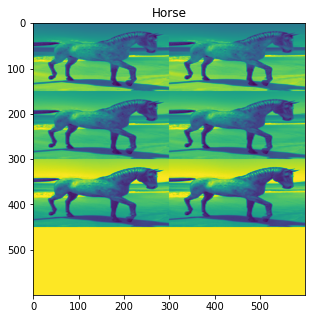

In [106]:
image, label = train_sample[0][0], train_sample[1][0]
view_image(image,label)

In [20]:
import torch
from torch import nn

In [21]:
input_shape = 360_000
hidden_units = 100
output_shape = 1

In [91]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Conv 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Conv 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=5184, out_features=512),
            nn.Linear(in_features=512, out_features=1)
        )
        
    
    def forward(self, x:torch.Tensor):
        a = self.conv1(x)
        a = self.conv2(a)
        a = self.conv3(a)
        a = self.conv4(a)
        a = self.conv5(a)
        return self.classifier(a)

In [92]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [93]:
conv = ConvNet().to(device)

In [94]:
conv

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(

In [95]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=conv.parameters(), lr=0.01)

In [96]:
epochs = 10

In [97]:
# Get helper functions
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [98]:
from helper_functions import accuracy_fn

In [99]:
import random as r

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------------

Train loss: 6.76488 | Train accuraccy: 71.78% | Test loss: 0.67508, Test acc: 80.47%

Train example: 


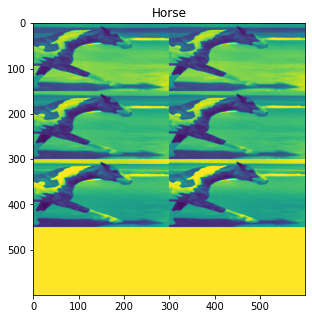


Test Example:


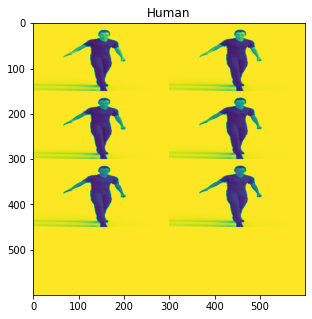

Epoch: 1
-----------------

Train loss: 1.37350 | Train accuraccy: 87.22% | Test loss: 1.63392, Test acc: 53.12%

Train example: 


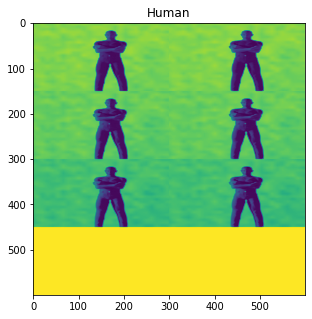


Test Example:


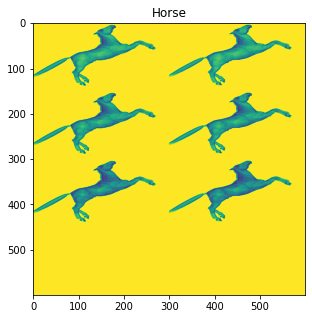

Epoch: 2
-----------------

Train loss: 0.10162 | Train accuraccy: 96.21% | Test loss: 1.34963, Test acc: 78.12%

Train example: 


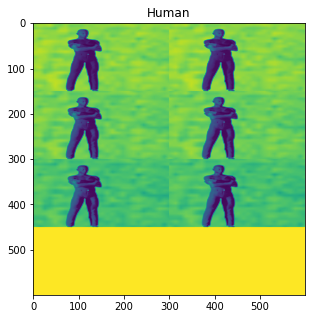


Test Example:


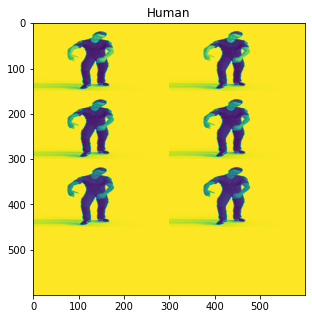

Epoch: 3
-----------------

Train loss: 0.04117 | Train accuraccy: 98.48% | Test loss: 1.28416, Test acc: 82.81%

Train example: 


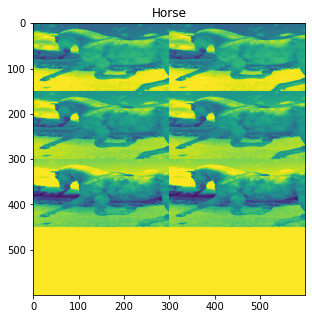


Test Example:


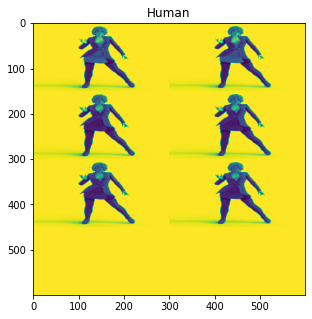

Epoch: 4
-----------------

Train loss: 0.00793 | Train accuraccy: 99.81% | Test loss: 3.05284, Test acc: 72.66%

Train example: 


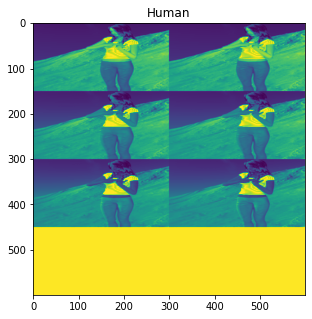


Test Example:


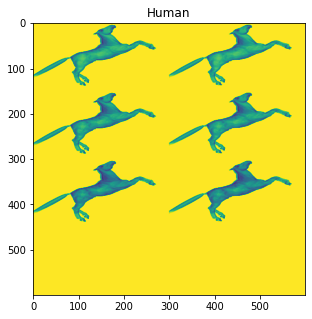

Epoch: 5
-----------------

Train loss: 0.00324 | Train accuraccy: 100.00% | Test loss: 3.60938, Test acc: 70.70%

Train example: 


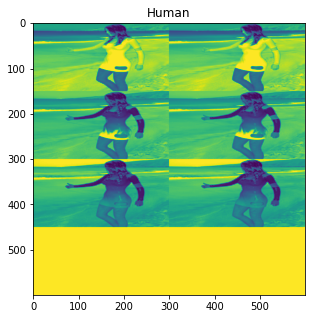


Test Example:


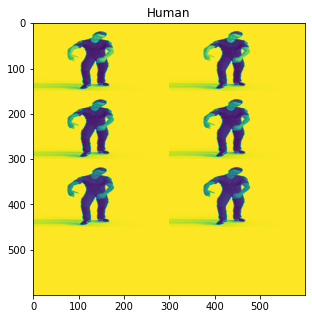

Epoch: 6
-----------------

Train loss: 0.00214 | Train accuraccy: 99.91% | Test loss: 3.86014, Test acc: 69.53%

Train example: 


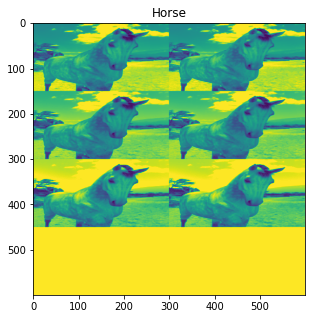


Test Example:


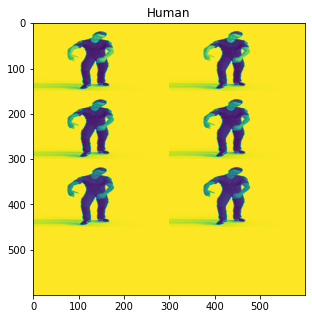

Epoch: 7
-----------------

Train loss: 0.00104 | Train accuraccy: 100.00% | Test loss: 4.17057, Test acc: 71.09%

Train example: 


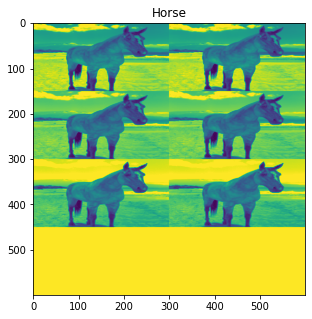


Test Example:


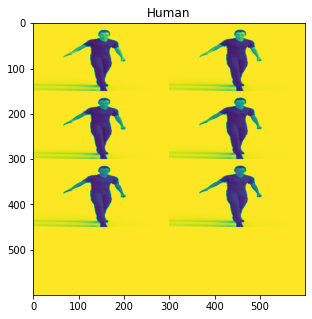

Epoch: 8
-----------------

Train loss: 0.00097 | Train accuraccy: 100.00% | Test loss: 5.63787, Test acc: 66.41%

Train example: 


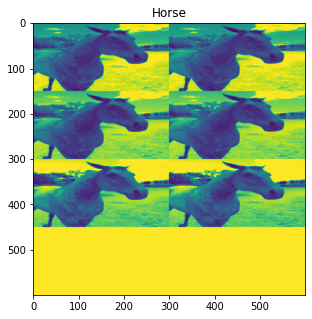


Test Example:


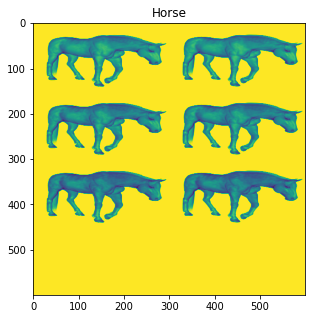

Epoch: 9
-----------------

Train loss: 0.03424 | Train accuraccy: 98.96% | Test loss: 2.86921, Test acc: 81.25%

Train example: 


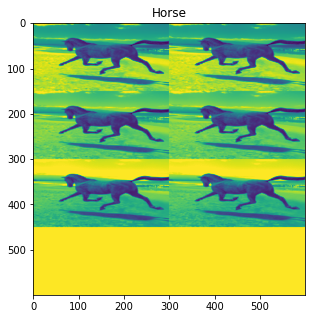


Test Example:


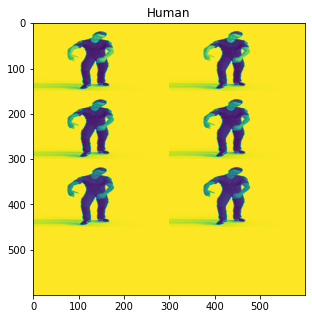

In [100]:
best_test_loss = 1_000_000
best_params = None

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------------")
    train_loss, train_acc, test_loss, test_acc = 0, 0, 0, 0
    conv.train()
    
    randn_pred, randn_image, randn_pred_test, randn_image_test = None, None, None, None
    
    for batch, (X,y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        y_logits = conv(X).squeeze()
        y_preds = torch.round(torch.sigmoid(y_logits))
        
        rand_no = r.randint(0,len(train_dataloader)-3)
        
        if randn_pred is None:
            randn_pred = y_preds[rand_no]
        
        if randn_image is None:
            randn_image = X[rand_no]
        
        loss = loss_fn(y_logits, y.float())
        acc = accuracy_fn(y, y_preds)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss
        train_acc += acc
    
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
        
    
    # EVAL
    conv.eval()
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)
            
            y_logits = conv(X).squeeze()
            y_preds = torch.round(torch.sigmoid(y_logits))
            
            rand_no_test = r.randint(0,len(test_dataloader)-3)
            
            if randn_pred_test is None:
                randn_pred_test = y_preds[rand_no_test]

            if randn_image_test is None:
                randn_image_test = X[rand_no_test]
            
            loss = loss_fn(y_logits, y.float())
            acc = accuracy_fn(y, y_preds)
            
            test_loss += loss
            test_acc += acc
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_params = conv.state_dict()
        
    
    
    print(f"\nTrain loss: {train_loss:.5f} | Train accuraccy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    print("Train example: ")
    view_image(randn_image, randn_pred)
    print("\nTest Example:")
    view_image(randn_image_test, randn_pred_test)